# Optimization exercise

## Goal: Train the 2nd order polynomial predictor using both gradient descent and stochastic gradient descent. Optimize the stepsizes and compare against scikit-learn implementation

1. Download data from https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing.
2. Create a function psi(x), which transforms features AST (assists), REB (rebounds) and STL (steals) into 2nd order polynomial features (add each feature squared and each pair of features multiplied with every other)
3. Create a transformed data matrix X, where each x is mapped to psi(x).
4. Create a function p2(x,w), which outputs the value of the polynomial at x for given parameters w.
5. Create a function Loss(X,y,w), which computes the squared loss of predicting y from X by p2(x,w) using parameters w. Take variable PTS as y. We will predict scored points based on assists, rebounds and steals.
6. Code up the gradient descent. It should input a point w and a stepsize.
7. Choose an arbitrary point and stepsize. Run gradient descent for 100 iterations and compute the Loss after each iteration. How does the loss behave? Does it converge to something?
8. Can you find the stepsize, for which the loss is smallest after 100 iterations?

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [92]:

nb = pd.read_csv('nba_games_2013_2015.csv', delimiter=';')
#x = nb[['AST']]
x = nb[['FGM','FG3M','FTM']]
y = nb['PTS']

In [66]:
y

0       144
1        92
2        98
3       101
4       110
       ... 
7375     87
7376    107
7377    116
7378     95
7379     97
Name: PTS, Length: 7380, dtype: int64

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [77]:
x_train

,FGM,FG3M,FTM
5965,42,6,25
4412,41,12,11
2526,27,3,16
3819,37,3,15
6253,44,13,17
...,...,...,...
5191,38,7,10
5226,40,9,11
5390,38,6,28
860,34,6,18


In [82]:
x_train = sm.add_constant(x_train) # adding a constant


In [83]:
lin_reg = sm.OLS(y_train, x_train)

In [84]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.700e+31
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        18:33:29   Log-Likelihood:             1.6691e+05
No. Observations:                5904   AIC:                        -3.338e+05
Df Residuals:                    5900   BIC:                        -3.338e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.676e-13   1.47e-14     18.186      0.0

In [85]:
X_train_sample = X_train.values.reshape(-1, 1)
y_train_sample = y_train

In [86]:
X_train_sample

array([[31],
       [33],
       [17],
       ...,
       [22],
       [25],
       [17]], dtype=int64)

In [87]:
lr_sample = LinearRegression()
lr_sample.fit(X_train_sample, y_train_sample)

LinearRegression()

In [88]:
lr_sample.score(X_train_sample, y_train_sample)

0.3200369770207945

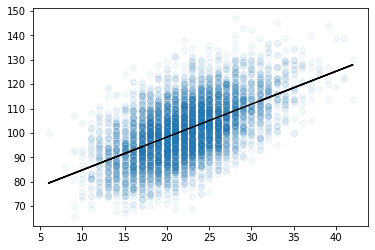

In [89]:
import matplotlib.pyplot as plt
plt.scatter(X_train_sample, y_train_sample, alpha=0.05)
plt.plot(X_train_sample, (lr_sample.coef_*X_train_sample)+lr_sample.intercept_, c='black')

In [90]:
from sklearn.linear_model import SGDClassifier
X = x_train
y = y_train
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
clf.fit(X, y)

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=100)

In [91]:
y_pred = clf.predict(x_test)

ValueError: X has 3 features per sample; expecting 4

In [80]:
y_test

1103    113
2338     99
7200     94
4013    110
2684    102
       ... 
4392    114
6408     99
6869    128
2288    105
4987    116
Name: PTS, Length: 1476, dtype: int64

In [81]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.03726287262872629

In [ ]:
from sklearn.metrics import r2_score